### **Índice do documento**

1. [Introdução](#1.-Introdução)    
    
2. [Compreensão do Dados](#2.-Compreensão-dos-Dados)

    2.1 [Carregamento das Bibliotecas Base](#2.1-Carregamento-das-Bibliotecas-Base)
    
    2.2 [Carregamento e Análise do *Dataset*](#2.2-Carregamento-e-Análise-do-*Dataset*)

    2.3 [Visualização do *Dataset*](#2.3-Visualização-do-*Dataset*)

### **Índice do documento** 
    
3. [Data Preprocessing](#3.-Data-Preprocessing)

    3.1 [Normalize the Data](#3.1-Normalize-the-Data)
    
    3.2 [Handle missing values if any](#3.2-Handle-missing-values-if-any)

    3.3 [Encode the target labels (activities) for classification](#3.3-)
    
    

## **2.1 Carregamento das Bibliotecas Base**

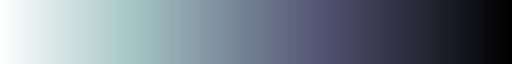

In [65]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
sns.color_palette("bone_r", as_cmap=True)

## **2.2 Carregamento do *Dataset***

In [66]:
# Definir o caminho do arquivo relativo ao diretório do script
file_path = os.path.join(os.getcwd(), 'RNN_dataset', 'concatDataset.csv')

In [67]:
df_motionSense = pd.read_csv(file_path)

In [68]:
df_motionSense.head(5)

,Unnamed: 0,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,subject_id,session_id,category,age,gender,height,weight
0,0,0.351138,-0.416302,-0.098023,0.314588,0.404381,-0.858784,-0.003655,0.009577,-0.000234,0.000094,0.000252,-0.006954,1,13,sit,46,1,188,102
1,1,0.351219,-0.416372,-0.098025,0.314649,0.404445,-0.858732,-0.007937,0.007457,0.000807,-0.001309,0.002262,-0.010348,1,13,sit,46,1,188,102
2,2,0.351145,-0.416497,-0.098045,0.314567,0.404560,-0.858708,-0.007960,-0.001053,-0.002387,-0.002174,0.000012,-0.006664,1,13,sit,46,1,188,102
3,3,0.350849,-0.416695,-0.098148,0.314286,0.404740,-0.858726,-0.000521,-0.006411,-0.001261,0.001693,0.009216,-0.011575,1,13,sit,46,1,188,102
4,4,0.350859,-0.416863,-0.098022,0.314271,0.404894,-0.858658,-0.001613,-0.004306,0.006206,0.005767,0.007490,-0.008926,1,13,sit,46,1,188,102


## **2.3 Data Preprocessing: Removing Unnecessary Columns**

In this Python code, a copy of the original DataFrame 'data_frame' is created. Subsequently, several columns ('Unnamed: 0', 'subject_id', 'session_id', 'age', 'gender', 'height', and 'weight') are removed from the copied DataFrame 'df' to streamline the dataset for further analysis.

In [69]:
#df = df_motionSense.copy() #making a copy of original dataframe
#df.drop('Unnamed: 0', axis=1, inplace=True)
#df.drop('subject_id', axis=1, inplace=True)
#df.drop('session_id', axis=1, inplace=True)
#df.drop('age', axis=1, inplace=True)
#df.drop('gender', axis=1, inplace=True)
#df.drop('height', axis=1, inplace=True)
#df.drop('weight', axis=1, inplace=True)
#df


df = df_motionSense.copy() #making a copy of original dataframe
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('age', axis=1, inplace=True)
df.drop('gender', axis=1, inplace=True)
df.drop('height', axis=1, inplace=True)
df.drop('weight', axis=1, inplace=True)
df

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,subject_id,session_id,category
0,0.351138,-0.416302,-0.098023,0.314588,0.404381,-0.858784,-0.003655,0.009577,-0.000234,0.000094,0.000252,-0.006954,1,13,sit
1,0.351219,-0.416372,-0.098025,0.314649,0.404445,-0.858732,-0.007937,0.007457,0.000807,-0.001309,0.002262,-0.010348,1,13,sit
2,0.351145,-0.416497,-0.098045,0.314567,0.404560,-0.858708,-0.007960,-0.001053,-0.002387,-0.002174,0.000012,-0.006664,1,13,sit
3,0.350849,-0.416695,-0.098148,0.314286,0.404740,-0.858726,-0.000521,-0.006411,-0.001261,0.001693,0.009216,-0.011575,1,13,sit
4,0.350859,-0.416863,-0.098022,0.314271,0.404894,-0.858658,-0.001613,-0.004306,0.006206,0.005767,0.007490,-0.008926,1,13,sit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840346,0.890518,-1.300928,0.089878,0.207249,0.963806,-0.167690,-0.920226,0.406762,-0.383194,0.044079,-0.204574,0.204906,9,8,wlk
840347,0.929499,-1.319499,0.124063,0.199247,0.968591,-0.148750,-0.923594,0.231559,-0.521862,0.066348,-0.222604,0.225136,9,8,wlk
840348,0.966103,-1.340284,0.159858,0.187951,0.973550,-0.129883,-0.970054,0.003083,-0.621238,-0.005959,-0.054040,0.240632,9,8,wlk
840349,1.005158,-1.362495,0.201540,0.174576,0.978384,-0.110827,-1.005371,-0.108297,-0.708937,-0.007767,-0.003927,0.194735,9,8,wlk


In [70]:
#making sure that there are no missing values hidden as a question mark
df.replace("?",np.nan,inplace=True)

## **2.4 Encoding Categorical Data for Machine Learning**

Following Python code snippet utilizes the 'LabelEncoder' from the scikit-learn library to transform the 'category' column in the DataFrame 'df' into numerical codes. These codes are stored in a new 'code' column, and the original 'category' column is subsequently removed from the DataFrame, preparing the data for machine learning tasks.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840351 entries, 0 to 840350
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   attitude.roll       840351 non-null  float64
 1   attitude.pitch      840351 non-null  float64
 2   attitude.yaw        840351 non-null  float64
 3   gravity.x           840351 non-null  float64
 4   gravity.y           840351 non-null  float64
 5   gravity.z           840351 non-null  float64
 6   rotationRate.x      840351 non-null  float64
 7   rotationRate.y      840351 non-null  float64
 8   rotationRate.z      840351 non-null  float64
 9   userAcceleration.x  840351 non-null  float64
 10  userAcceleration.y  840351 non-null  float64
 11  userAcceleration.z  840351 non-null  float64
 12  subject_id          840351 non-null  int64  
 13  session_id          840351 non-null  int64  
 14  category            840351 non-null  object 
dtypes: float64(12), int64(2), object(1

In [72]:
df.to_csv(file_path, index=False)